# Get transaction data for Raiden Network for one day
Date: 21.08.2021 \
Token: Raiden (RDN) \
Contract: 0x255Aa6DF07540Cb5d3d297f0D0D4D84cb52bc8e6

In [56]:
contract = "0x255Aa6DF07540Cb5d3d297f0D0D4D84cb52bc8e6"
symbol = "rdn"

In [57]:
#from web3_lib.web3 import _fetch_contract_list
# _fetch_contract_list() 

In [58]:
from web3_lib.web3 import get_contract_for_symbol

eth_address = get_contract_for_symbol(symbol)
print("Is contract equal to API-Data?: ", eth_address == contract.lower())

Is contract equal to API-Data?:  True


In [59]:
import time
import datetime

start_date = datetime.datetime.strptime("2018-08-21 00:00", "%Y-%m-%d %H:%M")
end_date = datetime.datetime.strptime("2018-08-22 23:59", "%Y-%m-%d %H:%M")

unix_start_date = time.mktime(start_date.timetuple())
unix_end_date = time.mktime(end_date.timetuple())

In [60]:
from web3_lib.web3 import get_block_number_for_unix_date

hex_block_number_start = get_block_number_for_unix_date(unix_start_date, True)
hex_block_number_end = get_block_number_for_unix_date(unix_end_date, True)

print(get_block_number_for_unix_date(unix_start_date, False))
print(get_block_number_for_unix_date(unix_end_date, False))

6183733
6195643


In [61]:
import json
from web3_lib.web3 import get_file_from_alchemy_api

params = {'jsonrpc': '2.0', 'method': 'alchemy_getAssetTransfers', 'params': [
    {
      "fromBlock": hex_block_number_start,
      "toBlock": hex_block_number_end,
      "contractAddresses": [contract],
      "category": ["erc20"],
      "withMetadata": True,
      "excludeZeroValue": True,
      # "maxCount": "0x3e8" # maximum transactions possible
    }
  ]}

answer_file = f"alchemy_answer_{symbol}.json"
get_file_from_alchemy_api(params, answer_file)

with open(answer_file, 'r') as openfile:
     json_data = json.load(openfile)

print("Number of returned transfers: ", len(json_data))

Answer is complete
Number of returned transfers:  146


## Plot Transfers

In [62]:
timestamps = list()
for transfer in json_data:
    timestamps.append(transfer['metadata']['blockTimestamp'])

In [63]:
def set_time_to_zero(timestamp):
    parts = timestamp.split('T')
    date = parts[0]
    time_parts = parts[1].split(':')
    hour = time_parts[0]
    modified_timestamp = date + ' ' + hour + ':00:00'
    return modified_timestamp

timestamps = [set_time_to_zero(timestamp) for timestamp in timestamps]

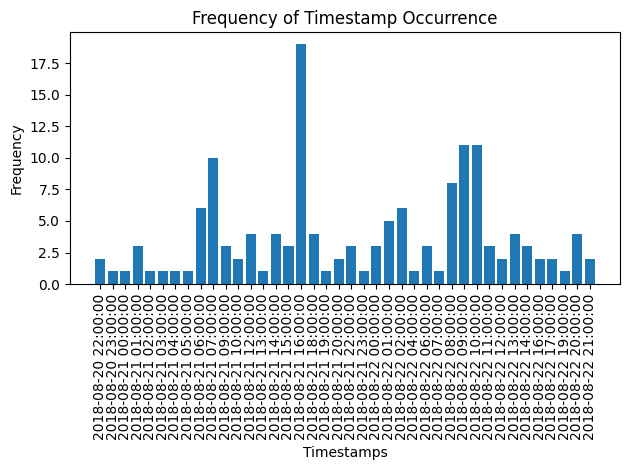

In [64]:
import matplotlib.pyplot as plt
from collections import Counter

timestamp_counts = Counter(timestamps)
x = range(len(timestamp_counts))
y = list(timestamp_counts.values())
labels = list(timestamp_counts.keys())

plt.bar(x, y)
plt.xlabel('Timestamps')
plt.ylabel('Frequency')
plt.title('Frequency of Timestamp Occurrence')
plt.xticks(x, labels, rotation='vertical')
plt.tight_layout()
plt.show()

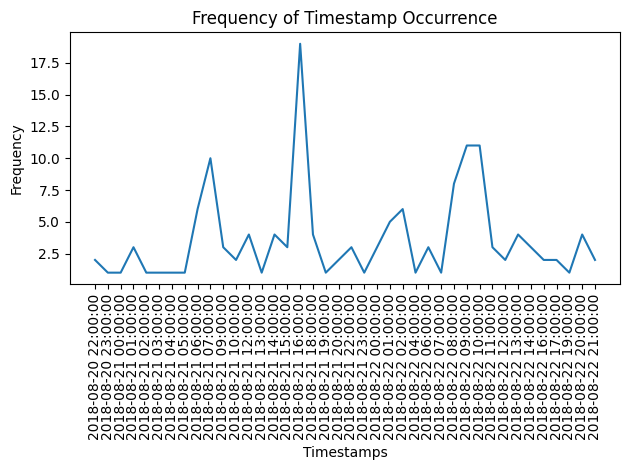

In [65]:
import matplotlib.pyplot as plt
from collections import Counter

timestamp_counts = Counter(timestamps)
x = range(len(timestamp_counts))
y = list(timestamp_counts.values())
labels = list(timestamp_counts.keys())
plt.plot(x, y)
plt.xlabel('Timestamps')
plt.ylabel('Frequency')
plt.title('Frequency of Timestamp Occurrence')
plt.xticks(x, labels, rotation='vertical')
plt.tight_layout()
plt.show()

## Compare validity of data with Etherscan download

In [66]:
import csv
 
filename = open('etherscan_new.csv', 'r')
file = csv.DictReader(filename)
 
TxHash = []
Datetime_col = []
 
for col in file:
    TxHash.append(col['Txhash'])
    Datetime_col.append(col['DateTime'])
 
print('TxHash:', TxHash)
print('Datetime:', Datetime_col)

TxHash: ['0x596c6f9ab487826a9f57c93d0083df1ce43d19a0167d0ce1f15e287d0bd2615b', '0xe5f0248213b9221c4e0b691c8e9d09f1ee65f5fde35b84d1e643afe974fc2ba9', '0xa96bb8cd305bad9a5d27b1d2edd89b20862767d98a25d0676b88a74d5f34d943', '0xb0e9247e33157249416d24026d82a85bc6889c329df589d65449aa193ee597f5', '0xc85e09c0effd529492f3c6c68a238b9ab6f1bc8a7450db9691347af681a6c771', '0xabaafecaae73b504cc447b6138b7a018b430098ff4de02f317275568f834f846', '0x2c6bb3871b17d4b72427117d8fa14e557cad3ed8ef82082b76f0c0b9214c4c0a', '0x53e8eb2e39b86f15844d4b0b08c53f986f84d4dc658a9d73b15ad068764c8fee', '0x711a8e4066b4da6999b2f839c94ac13dc88330335dbf6a53fbc18f18185c6720', '0x711a8e4066b4da6999b2f839c94ac13dc88330335dbf6a53fbc18f18185c6720', '0xfa6b6dafe441500e04619e43b5ff5c9bb712e0b45044f78432b5ecb07b96bf95', '0x6cd56777e3d07770fce6e8170914f2cdc9fe13678f77a0e9d437fc5760676d65', '0xd3ee94b912faef4977ba13753697c13fd4b51c2fb81d5d6b6500d78a4596edd2', '0x05cd7b33dd5a99a6979cbdeb3d171477ba90e0f020ad8ea8db61df95c6a90640', '0x18a8f0c5

In [67]:
# number of transactions
print("Do they have an equal amount of transactions?")
print("Etherscan Transactions: ", len(TxHash))
print("Alchemy Transactions: ", len(json_data))

Do they have an equal amount of transactions?
Etherscan Transactions:  144
Alchemy Transactions:  146


['2018-08-21 00:00:00', '2018-08-21 01:00:00', '2018-08-21 02:00:00', '2018-08-21 03:00:00', '2018-08-21 04:00:00', '2018-08-21 05:00:00', '2018-08-21 06:00:00', '2018-08-21 07:00:00', '2018-08-21 09:00:00', '2018-08-21 10:00:00', '2018-08-21 12:00:00', '2018-08-21 13:00:00', '2018-08-21 14:00:00', '2018-08-21 15:00:00', '2018-08-21 16:00:00', '2018-08-21 18:00:00', '2018-08-21 19:00:00', '2018-08-21 20:00:00', '2018-08-21 22:00:00', '2018-08-21 23:00:00', '2018-08-22 00:00:00', '2018-08-22 01:00:00', '2018-08-22 02:00:00', '2018-08-22 04:00:00', '2018-08-22 06:00:00', '2018-08-22 07:00:00', '2018-08-22 08:00:00', '2018-08-22 09:00:00', '2018-08-22 10:00:00', '2018-08-22 11:00:00', '2018-08-22 12:00:00', '2018-08-22 13:00:00', '2018-08-22 14:00:00', '2018-08-22 16:00:00', '2018-08-22 17:00:00', '2018-08-22 19:00:00', '2018-08-22 20:00:00', '2018-08-22 21:00:00', '2018-08-22 23:00:00']


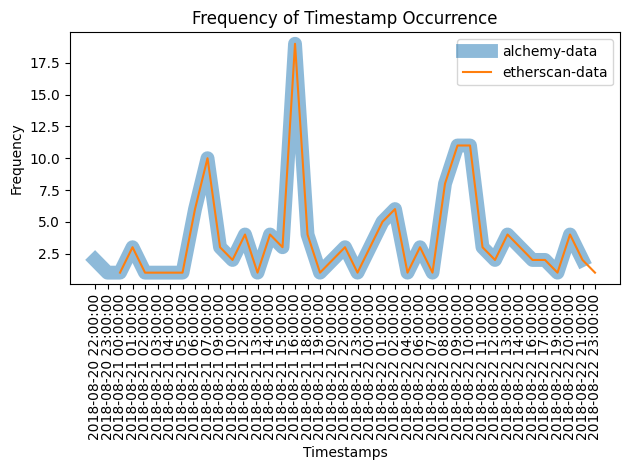

In [71]:
# Datetime comparison

import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime

timestamps_etherscan = list()
for timestamp in Datetime_col:
    datetime_obj = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S')
    datetime_obj = datetime_obj.replace(minute=0, second=0, microsecond=0)
    timestamps_etherscan.append(datetime_obj.strftime('%Y-%m-%d %H:%M:%S'))

timestamp_counts_alchemy = Counter(timestamps)
timestamps_etherscan_counted = Counter(timestamps_etherscan)

x = list(timestamp_counts_alchemy.keys())
y = list(timestamp_counts_alchemy.values())

x_etherscan = list(timestamps_etherscan_counted.keys())
y_etherscan = list(timestamps_etherscan_counted.values())
print(x_etherscan)

plt.plot(x, y, label="alchemy-data",alpha=0.5,linewidth=10)
plt.plot(x_etherscan, y_etherscan, label="etherscan-data")

combined = timestamp_counts_alchemy + timestamps_etherscan_counted
labels = list(combined.keys())

plt.legend()
plt.xlabel('Timestamps')
plt.ylabel('Frequency')
plt.title('Frequency of Timestamp Occurrence')
plt.xticks(range(len(combined)), labels, rotation='vertical')
plt.tight_layout()
plt.show()

## Frequency of Trades vs Frequency of Transfers, ....

Use Etherscan API

## Retrieve involved Wallets

Total number of transfers:  146
['0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be', '0x689c56aef474df92d44a1b70850f808488f9769c', '0x564286362092d8e7936f0549571a803b203aaced', '0x0681d8db095565fe8a346fa0277bffde9c0edbbf', '0x91a502c678605fbce581eae053319747482276b9', '0x63825c174ab367968ec60f061753d3bbd36a0d8f', '0xee6a089f26d549482ad14ff305ea761c45e7dbd5', '0x0d0707963952f2fba59dd06f2b425ace40b492fe', '0xad0a2478ba25816365aa0e32d77aff92b9e34efc', '0x63d118842d21a96b03bdc01672164afea93fd937', '0x18d53eb35f50bf7b7a75652c429e444f936598c8', '0x5735fbac26bb21ca3c5228022cc382136038087c', '0x46705dfff24256421a05d056c29e81bdc09723b8', '0xd551234ae421e3bcba99a0da6d736074f22192ff', '0xb2fa68e7aa90a3c7e1cf974a9829a9c134e5d6d5', '0x6cc5f688a315f3dc28a7781717a9a798a59fda7b', '0xcf0697240463c242f2fa3e4101fab6f7d29b44fc', '0x2b5634c42055806a59e9107ed44d43c426e58258', '0x876eabf441b2ee5b5b0554fd502a8e0600950cfa', '0xfa4b5be3f2f84f56703c42eb22142744e95a2c58', '0xfdb16996831753d5331ff813c29a93c76834a0ad', '

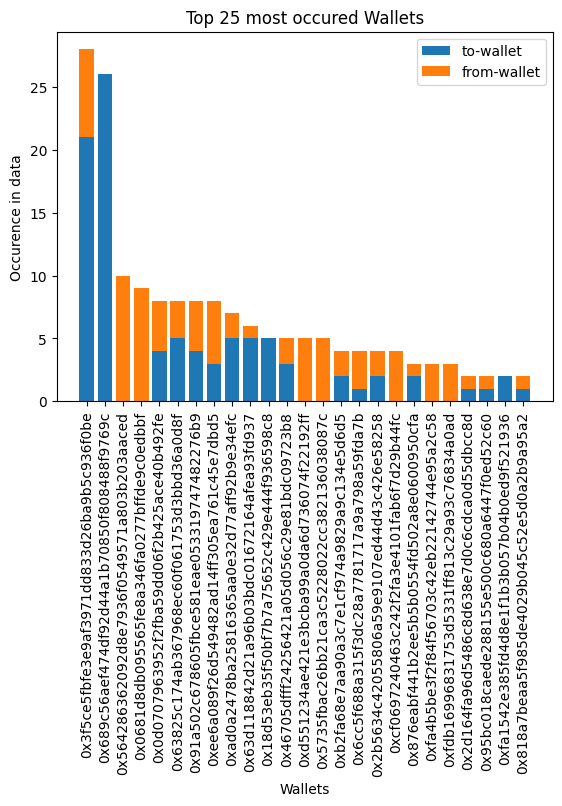

In [100]:
print("Total number of transfers: ", len(json_data))

to_wallets = list()
from_wallets = list()
for transfer in json_data:
    from_wallets.append(transfer["from"])
    to_wallets.append(transfer["to"])

to_wallets_counted = Counter(to_wallets)
from_wallets_counted = Counter(from_wallets)

combined = to_wallets_counted + from_wallets_counted
most_common = combined.most_common(25)
keys = [x[0] for x in most_common]
print(keys)

to_values = [to_wallets_counted[key] for key in keys]
from_values = [from_wallets_counted[key] for key in keys]

plt.bar(labels, to_values, label="to-wallet")
plt.bar(labels, from_values, label="from-wallet", bottom=to_values)

plt.xlabel('Wallets')
plt.ylabel('Occurence in data')
plt.legend()
plt.title('Top 25 most occured Wallets')
plt.xticks(rotation='vertical')
plt.show()